In [ ]:
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [ ]:

df = read_csv('weatherHistory.csv')
unique_mapping = {}
df['Summary'], uniques = factorize(df['Summary'])
unique_mapping['Summary'] = dict(enumerate(uniques))
print(df)
print(unique_mapping)


       Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0            0        rain         9.472222                  7.388889   
1            0        rain         9.355556                  7.227778   
2            1        rain         9.377778                  9.377778   
3            0        rain         8.288889                  5.944444   
4            1        rain         8.755556                  6.977778   
...        ...         ...              ...                       ...   
96448        0        rain        26.016667                 26.016667   
96449        0        rain        24.583333                 24.583333   
96450        0        rain        22.038889                 22.038889   
96451        0        rain        21.522222                 21.522222   
96452        0        rain        20.438889                 20.438889   

       Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0          0.89            14.1197          

In [ ]:
df['Precip Type']=df['Precip Type'].map({"rain":26,"snow":27})
print(df)



       Summary  Precip Type  Temperature (C)  Apparent Temperature (C)  \
0            0         26.0         9.472222                  7.388889   
1            0         26.0         9.355556                  7.227778   
2            1         26.0         9.377778                  9.377778   
3            0         26.0         8.288889                  5.944444   
4            1         26.0         8.755556                  6.977778   
...        ...          ...              ...                       ...   
96448        0         26.0        26.016667                 26.016667   
96449        0         26.0        24.583333                 24.583333   
96450        0         26.0        22.038889                 22.038889   
96451        0         26.0        21.522222                 21.522222   
96452        0         26.0        20.438889                 20.438889   

       Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0          0.89            14.11

In [ ]:
x=df.dropna()
x.drop(['Apparent Temperature (C)'],axis=1,inplace=True)
x



<ipython-input-306-893586cfe5fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['Apparent Temperature (C)'],axis=1,inplace=True)


,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0,26.0,9.472222,0.89,14.1197,251,15.8263,1015.13
1,0,26.0,9.355556,0.86,14.2646,259,15.8263,1015.63
2,1,26.0,9.377778,0.89,3.9284,204,14.9569,1015.94
3,0,26.0,8.288889,0.83,14.1036,269,15.8263,1016.41
4,1,26.0,8.755556,0.83,11.0446,259,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,0,26.0,26.016667,0.43,10.9963,31,16.1000,1014.36
96449,0,26.0,24.583333,0.48,10.0947,20,15.5526,1015.16
96450,0,26.0,22.038889,0.56,8.9838,30,16.1000,1015.66
96451,0,26.0,21.522222,0.60,10.5294,20,16.1000,1015.95


In [ ]:
len(x)

95936

In [ ]:
corr= x.corr()
corr

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Summary,1.000000,0.116966,-0.188929,0.159804,0.093145,-0.012773,-0.182018,-0.130490
Precip Type,0.116966,1.000000,-0.563503,0.232622,-0.067771,-0.042142,-0.316483,0.009271
Temperature (C),-0.188929,-0.563503,1.000000,-0.632148,0.008304,0.029937,0.393719,-0.005253
Humidity,0.159804,0.232622,-0.632148,1.000000,-0.224569,0.000814,-0.370511,0.005375
Wind Speed (km/h),0.093145,-0.067771,0.008304,-0.224569,1.000000,0.104366,0.100801,-0.049453
Wind Bearing (degrees),-0.012773,-0.042142,0.029937,0.000814,0.104366,1.000000,0.048900,-0.011629
Visibility (km),-0.182018,-0.316483,0.393719,-0.370511,0.100801,0.048900,1.000000,0.061011
Pressure (millibars),-0.130490,0.009271,-0.005253,0.005375,-0.049453,-0.011629,0.061011,1.000000


In [ ]:
corr['Temperature (C)'].sort_values(ascending=False)

,Temperature (C)
Temperature (C),1.000000
Visibility (km),0.393719
Wind Bearing (degrees),0.029937
Wind Speed (km/h),0.008304
Pressure (millibars),-0.005253
Summary,-0.188929
Precip Type,-0.563503
Humidity,-0.632148


In [ ]:
x['Visibility (km)'].min(),x['Visibility (km)'].max()

(0.0, 16.1)

In [ ]:
x['VisibilityCat']=np.ceil(x['Visibility (km)']/2)
x['VisibilityCat'].value_counts().sort_index()

<ipython-input-311-e2026ad5a1c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['VisibilityCat']=np.ceil(x['Visibility (km)']/2)


,count
VisibilityCat,
0.0,291
1.0,4500
2.0,4539
3.0,5551
4.0,6694
5.0,25787
6.0,21685
7.0,699
8.0,18705


In [ ]:
x['VisibilityCat'].value_counts().sort_index()/len(x)

,count
VisibilityCat,
0.0,0.003033
1.0,0.046906
2.0,0.047313
3.0,0.057861
4.0,0.069776
5.0,0.268794
6.0,0.226036
7.0,0.007286
8.0,0.194974


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(x, x['VisibilityCat']):
    strat_train_set= x.iloc[train_index]
    strat_test_set= x.iloc[test_index]

In [ ]:
strat_train_set['VisibilityCat'].value_counts().sort_index()/len(strat_train_set)

,count
VisibilityCat,
0.0,0.003036
1.0,0.046907
2.0,0.047311
3.0,0.057865
4.0,0.069774
5.0,0.268789
6.0,0.226038
7.0,0.007284
8.0,0.194976


In [ ]:
strat_train_set.drop('VisibilityCat', axis=1, inplace=True)
strat_test_set.drop('VisibilityCat', axis=1, inplace=True)

<ipython-input-315-b5d4f0338a04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_train_set.drop('VisibilityCat', axis=1, inplace=True)
<ipython-input-315-b5d4f0338a04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_test_set.drop('VisibilityCat', axis=1, inplace=True)


In [ ]:
X_train= strat_train_set.drop('Temperature (C)', axis=1)
y_train= strat_train_set['Temperature (C)'].copy()
X_test= strat_test_set.drop('Temperature (C)', axis=1)
y_test= strat_test_set['Temperature (C)'].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print("1st")
df=DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df)

1st
          Actual  Predicted
36031  17.616667  12.991593
36136  27.727778  22.915905
21872  22.072222  17.890532
65472  19.466667  12.921865
22806   7.150000  16.323338
...          ...        ...
94554   7.222222  10.810174
60818  16.416667  12.001731
49290  11.083333  19.873725
90240  10.461111  13.062992
52176  18.288889   9.193962

[19188 rows x 2 columns]


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
y_pred1 = gbm.predict(X_test)
print("2nd")
df1=DataFrame({'Actual':y_test,'Predicted':y_pred1})
print(df1)
from sklearn import metrics
from sklearn.metrics import r2_score
print('r_2 statistic: %.2f' % r2_score(y_test,y_pred))
print('r_2 statistic: %.2f' % r2_score(y_test,y_pred1))

2nd
          Actual  Predicted
36031  17.616667  15.742150
36136  27.727778  18.838127
21872  22.072222  21.209338
65472  19.466667  15.395387
22806   7.150000  17.670318
...          ...        ...
94554   7.222222   6.431548
60818  16.416667  12.333527
49290  11.083333  11.082971
90240  10.461111  11.637565
52176  18.288889  13.367610

[19188 rows x 2 columns]
r_2 statistic: 0.61
r_2 statistic: 0.73


In [ ]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
checkpoint_cb= tf.keras.callbacks.ModelCheckpoint('my_keras_model.keras', save_best_only=True)

In [ ]:
model.compile(loss='mse',optimizer='sgd', metrics=['mae'])
# from keras.optimizers import Adam
# opt = Adam(learning_rate=0.001)
# model.compile(loss='mse',optimizer=opt, metrics=['mae'])


In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                     │ (None, 100)                 │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,201 (121.88 KB)

 Trainable params: 31,201 (121.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train, y_train, epochs=30, validation_split=0.2,verbose=1,callbacks=[checkpoint_cb])

Epoch 1/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 47.1954 - mae: 5.2576 - val_loss: 37.1773 - val_mae: 4.7441
Epoch 2/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 30.5776 - mae: 4.4094 - val_loss: 27.3199 - val_mae: 4.1785
Epoch 3/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 28.0815 - mae: 4.2118 - val_loss: 27.3134 - val_mae: 4.1390
Epoch 4/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 27.2327 - mae: 4.1448 - val_loss: 33.6488 - val_mae: 4.7728
Epoch 5/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 26.8031 - mae: 4.1194 - val_loss: 24.8983 - val_mae: 3.9544
Epoch 6/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 26.2764 - mae: 4.0527 - val_loss: 25.7232 - val_mae: 4.0081
Epoch 7/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 26.2054 - mae: 4.0539 - val_loss: 26.7888 - val_mae: 3.9865
Epoch 8/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 25.9930 - mae: 4.0373 - val_loss: 25.2503 - val_mae: 3.9624
Epoch 9/30
1919/1919 ━━━

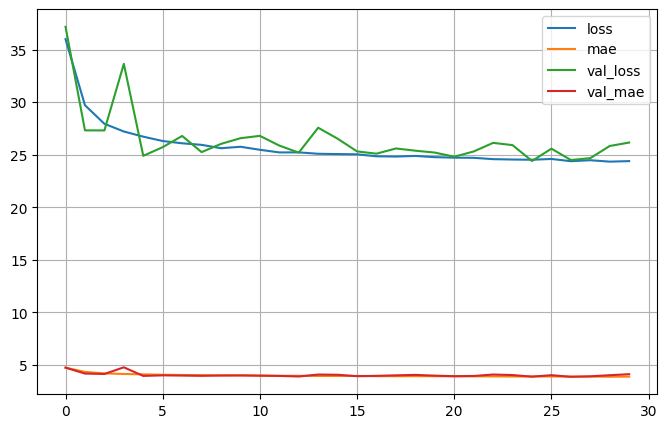

In [ ]:
DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [ ]:
best_model= tf.keras.models.load_model('my_keras_model.keras')

In [ ]:
best_model.evaluate(X_test, y_test)

600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25.0459 - mae: 3.9377


[24.886371612548828, 3.9205288887023926]

In [ ]:
y_pred3=best_model.predict(X_test)

600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
r2_score(y_test,y_pred3)

0.7271434733650683